In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt

In [6]:
start_date = dt.datetime(2018, 7, 1)
end_date = dt.datetime(2019, 7, 1)
stocks = 'tsla fcx intc'.split()

In [7]:
### Get one year of data from 2018 July 
df = web.DataReader(stocks, 'yahoo', start_date, end_date)

In [9]:
df.head(4)

Attributes        High                               Low             \
Symbols           tsla        fcx       intc        tsla        fcx   
Date                                                                  
2018-07-02  364.779999  17.170000  50.270000  329.850006  16.790001   
2018-07-03  332.489990  17.549999  50.860001  309.690002  16.930000   
2018-07-05  314.390015  17.370001  50.959999  296.220001  16.660000   
2018-07-06  312.070007  17.610001  51.500000  302.000000  16.690001   

Attributes                   Open                             Close  \
Symbols          intc        tsla        fcx       intc        tsla   
Date                                                                  
2018-07-02  48.830002  360.070007  17.020000  49.040001  335.070007   
2018-07-03  49.430000  331.750000  17.200001  50.580002  310.859985   
2018-07-05  49.750000  313.760010  17.070000  49.980000  309.160004   
2018-07-06  50.400002  304.950012  16.920000  50.770000  308.899994   

Attributes                            Volume                          \
Symbols           fcx       intc        tsla         fcx        intc   
Date                                                                   
2018-07-02  17.160000  50.200001  18759800.0  14426400.0  23755500.0   
2018-07-03  17.070000  49.470001  12282600.0   8460000.0  16327900.0   
2018-07-05  16.969999  50.750000  17476400.0  17618100.0  26163500.0   
2018-07-06  17.510000  51.369999   8865500.0  15283900.0  19968000.0   

Attributes   Adj Close                        
Symbols           tsla        fcx       intc  
Date                                          
2018-07-02  335.070007  16.833124  48.643845  
2018-07-03  310.859985  16.744841  47.936470  
2018-07-05  309.160004  16.646744  49.176792  
2018-07-06  308.899994  17.176460  49.777573

In [10]:
### Lets look at only adjusted close
df = df['Adj Close']

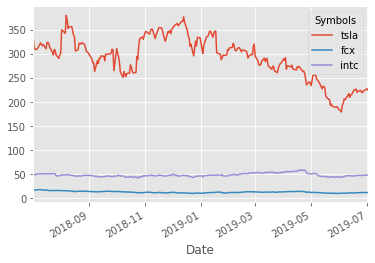

In [13]:
# Lets plot the data 
df.plot()

In [21]:
# We see that high price tsla stock is plotted well but the other two stocks suffer from the scale.
# we have two options here. We can use min max scaler to normalize the data
max_, min_ = np.max(df), np.min(df)

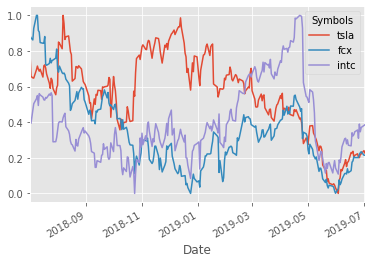

In [28]:
df_norm = ((df-np.min(df))/(max_-min_))
df_norm.plot()

In [29]:
# we can see a lot better graphs for all stocks since they are normalized
## Be sure to denormalize for final data 

In [59]:
def new_cols(suf='suf'):
    return [x+'_'+suf for x in stocks]

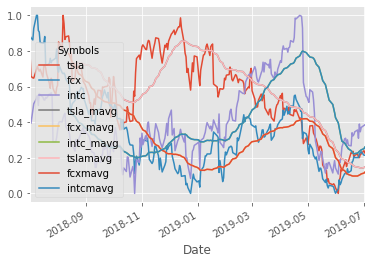

In [56]:
# Lets add moving average to capture the trends
df_norm[new_cols('mavg')] =  df_norm[stocks].rolling(30, ).mean()
# df_norm.plot(title='moving avg for 30 days')
# df_norm.plot(title='tickers')
df_norm.plot()

In [60]:
# lets calculate the daily returns. It is nothing but (today's price - ydays' price)/yday's price
df_norm[new_cols('return')]=df_norm[stocks]/df_norm[stocks].shift(1) - 1


In [75]:
# df_norm.drop([x+'mavg' for x in stocks], axis=1, inplace=True)

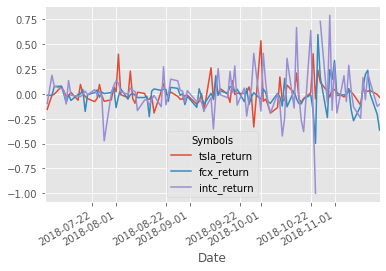

In [78]:
df_norm[new_cols('return')].head(100).plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c03f8350>,
      dtype=object)

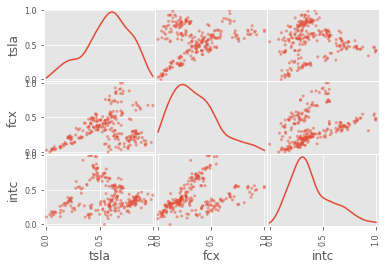

In [84]:
pd.plotting.scatter_matrix(df_norm[stocks], diagonal='kde')

In [87]:
from sklearn import linear_model, feature_extraction, feature_selection, pipeline, preprocessing, model_selection

In [88]:
linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
train_test_ratio = int(df_norm.shape[0]*0.8)

In [117]:
tsla.shift(-1).iloc[:train_test_ratio, :]

Symbols,tsla,tsla_mavg,tsla_return
Date,,,
2018-07-02,0.657477,NaN,-0.155093
2018-07-03,0.649003,NaN,-0.012889
2018-07-05,0.647707,NaN,-0.001997
2018-07-06,0.695613,NaN,0.073963
2018-07-09,0.715354,NaN,0.028379
...,...,...,...
2019-04-12,0.435743,0.484767,-0.014877
2019-04-15,0.470538,0.484239,0.079853
2019-04-16,0.459920,0.483406,-0.022566


In [224]:
tsla = df[[x for x in df.columns if 'intc' in x]]
X = tsla.iloc[:train_test_ratio, 0]
y = (tsla.shift(-1)).iloc[:train_test_ratio:, 0]
# tsla.iloc[-1, 0]
X_test = tsla.iloc[train_test_ratio:-1, 0]
y_test = (tsla.shift(-1)).iloc[train_test_ratio:-1, 0]

In [225]:
y_test

Date
2019-04-22    58.030403
2019-04-23    57.971169
2019-04-24    56.875328
2019-04-25    51.761387
2019-04-26    50.458218
2019-04-29    50.389111
2019-04-30    50.112682
2019-05-01    49.905361
2019-05-02    51.090057
2019-05-03    50.876499
2019-05-06    50.141460
2019-05-07    48.909779
2019-05-08    46.307346
2019-05-09    45.890163
2019-05-10    44.459820
2019-05-13    44.867069
2019-05-14    45.314053
2019-05-15    45.224655
2019-05-16    44.588947
2019-05-17    43.267868
2019-05-20    44.161831
2019-05-21    43.704918
2019-05-22    44.231361
2019-05-23    44.271095
2019-05-24    43.277802
2019-05-28    43.933376
2019-05-29    44.430023
2019-05-30    43.744652
2019-05-31    43.168537
2019-06-03    44.489620
2019-06-04    44.251228
2019-06-05    44.797539
2019-06-06    45.721302
2019-06-07    46.486137
2019-06-10    46.535805
2019-06-11    46.009357
2019-06-12    46.386810
2019-06-13    45.880230
2019-06-14    45.820633
2019-06-17    47.052315
2019-06-18    46.754330
2019-06-19 

In [226]:
# X_test = df_norm[train_test_ratio:]
# y_test = df_norm[-1]
[X, X_test, y, y_test] = [np.reshape(np.array(x), (-1, 1)) for x in [X, X_test, y, y_test]]


In [235]:
from sklearn.metrics import accuracy_score
def model_fit_eval(model, name=''):
#     print(X[:5, :], y[:5, :])
#     model = model.LinearRegression()
    model.fit(X, y)
    score = model.score(X_test, y_test)
    preds = model.predict(X_test)
    print(f'Accuracy of {name} model: {score}')
    return preds

In [238]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

linreg = linear_model.LinearRegression()
ridge = make_pipeline(PolynomialFeatures(3), Ridge())
lasso = make_pipeline(PolynomialFeatures(3), Lasso())
knn = KNeighborsRegressor(n_neighbors=20)

models = [linreg, ridge, lasso, knn]
names = 'Linear Ridge Lasso KNN'.split()

preds = [model_fit_eval(x,y) for x,y in zip(models, names)]
pass

Accuracy of Linear model: 0.9071404433965556
Accuracy of Ridge model: 0.8921387265157626
Accuracy of Lasso model: 0.8855306681564724
Accuracy of KNN model: 0.8994438533332272


In [249]:
## As you can see all the models are similar with the predictions for the bare bone data
print('printing the best predictions and comparing the results with actual data')

# pd.DataFrame([pd.Series(preds[0]), pd.Series(y_test)])
pd.DataFrame(zip(np.shape(preds[0], (, y_test), columns='predictions actual'.split())



printing the best predictions and comparing the results with actual data


,predictions,actual
0,[57.96959486633278],[58.03040313720703]
1,[57.93069095188921],[57.971168518066406]
2,[57.87234071683852],[56.875328063964844]
3,[56.79286136840083],[51.76138687133789]
4,[51.75527228697604],[50.45821762084961]
5,[50.47155960037472],[50.38911056518555]
6,[50.40348432614892],[50.1126823425293]
7,[50.13118322924572],[49.90536117553711]
8,[49.92695740656832],[51.090057373046875]
9,[51.09396586532515],[50.87649917602539]
